pip install quandl

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [3]:
#Importing datasets
df_citi_bike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared 2.csv'))

In [4]:
df_citi_bike.head()

day_of_week  start_hour       start_time  start_station_id  \
0         Mon          18   9/9/2013 18:18               523   
1         Thu          18  9/12/2013 18:38               257   
2         Wed          19  9/18/2013 19:44               479   
3         Sat          11  9/28/2013 11:54               527   
4         Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  ...  trip_duration  \
0   9/9/2013 18:35             334      W 20 St & 7 Ave  ...            993   
1  9/12/2013 18:48             236  St Marks Pl & 2 Ave  ...            581   
2  9/18/2013 19:50             513     W 56 St & 10 Ave  ...            361   
3  9/28/2013 12:03             441      E 52 St & 2 Ave  ...            561   
4   9/7/2013 18:46             476      E 31 St & 3 Ave  ...           2296   

       subscriber  birth_year gender   end_date end_hour trip_duration_min  \
0      Subscriber      1968.0      F   9/9/2013       18         16.550000   
1      Subscriber      1983.0      M  9/12/2013       18          9.683333   
2      Subscriber      1989.0      M  9/18/2013       19          6.016667   
3      Subscriber      1988.0      F  9/28/2013       12          9.350000   
4  Non-Subscriber         NaN    NaN   9/7/2013       18         38.266667   

     Age Group  Trip Duration Group Day of the Week Label  
0  Middle Aged               Medium                     1  
1        Young                Short                     4  
2        Young                Short                     3  
3        Young                Short                     6  
4  Middle Aged                 Long                     6  

[5 rows x 22 columns]

In [5]:
df_citi_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              50000 non-null  object 
 1   start_hour               50000 non-null  int64  
 2   start_time               50000 non-null  object 
 3   start_station_id         50000 non-null  int64  
 4   start_station_name       50000 non-null  object 
 5   start_station_latitude   50000 non-null  float64
 6   start_station_longitude  50000 non-null  float64
 7   end_time                 50000 non-null  object 
 8   end_station_id           50000 non-null  int64  
 9   end_station_name         50000 non-null  object 
 10  end_station_latitude     50000 non-null  float64
 11  end_station_longitude    50000 non-null  float64
 12  trip_duration            50000 non-null  int64  
 13  subscriber               50000 non-null  object 
 14  birth_year            

# Creating a Date Subset

The subset will be date and the number of total bike trips.

In [6]:
#Splitting start_time variable to separate the date from the time
df_citi_bike[['start_date', 'start_time_2']] = df_citi_bike['start_time'].str.split(' ', expand=True)

In [7]:
#Dropping unnecessary column
df_citi_bike = df_citi_bike.drop(columns = ['start_time_2'])

In [8]:
#Checking output of new column
df_citi_bike['start_date']

0         9/9/2013
1        9/12/2013
2        9/18/2013
3        9/28/2013
4         9/7/2013
           ...    
49995    9/21/2013
49996    9/14/2013
49997     9/7/2013
49998     9/7/2013
49999    9/23/2013
Name: start_date, Length: 50000, dtype: object

In [9]:
#Creating new dataframe calculating number of trips per day
#df_citi_bike_subset = df_citi_bike.groupby('start_date').agg(num_of_trips = ('start_date', 'count'), avg_ride_time = ('trip_duration_min', 'mean'))
df_citi_bike_subset = df_citi_bike.groupby('start_date').agg(num_of_trips = ('start_date', 'count'))

In [10]:
#Checking output
df_citi_bike_subset.head()

num_of_trips
start_date              
9/1/2013            1190
9/10/2013           1810
9/11/2013           1773
9/12/2013           1527
9/13/2013           1836

In [11]:
df_citi_bike_subset = df_citi_bike_subset.reset_index()

In [12]:
df_citi_bike_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   start_date    30 non-null     object
 1   num_of_trips  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [13]:
df_citi_bike_subset.head()

start_date  num_of_trips
0   9/1/2013          1190
1  9/10/2013          1810
2  9/11/2013          1773
3  9/12/2013          1527
4  9/13/2013          1836

In [14]:
df_citi_bike_subset.head()

start_date  num_of_trips
0   9/1/2013          1190
1  9/10/2013          1810
2  9/11/2013          1773
3  9/12/2013          1527
4  9/13/2013          1836

In [15]:
from datetime import datetime

In [16]:
#Creating column with datetime datatype
df_citi_bike_subset['date'] = pd.to_datetime(df_citi_bike_subset['start_date'])
df_citi_bike_subset.drop(['start_date'], axis = 1, inplace = True)
df_citi_bike_subset

num_of_trips
date                    
2013-09-01          1190
2013-09-10          1810
2013-09-11          1773
2013-09-12          1527
2013-09-13          1836
2013-09-14          1567
2013-09-15          1610
2013-09-16          1473
2013-09-17          1838
2013-09-18          1841
2013-09-19          1811
2013-09-02          1041
2013-09-20          2000
2013-09-21          1599
2013-09-22          1431
2013-09-23          1720
2013-09-24          1878
2013-09-25          1845
2013-09-26          1895
2013-09-27          1752
2013-09-28          1734
2013-09-29          1511
2013-09-03          1539
2013-09-30          1816
2013-09-04          1769
2013-09-05          1624
2013-09-06          1721
2013-09-07          1607
2013-09-08          1577
2013-09-09          1665

In [17]:
df_citi_bike_subset = df_citi_bike_subset.reset_index()

In [18]:
#Checking output after restarting index
df_citi_bike_subset.head()

date  num_of_trips
0 2013-09-01          1190
1 2013-09-10          1810
2 2013-09-11          1773
3 2013-09-12          1527
4 2013-09-13          1836

In [19]:
#Setting dates in proper order
df_citi_bike_subset = df_citi_bike_subset.sort_values('date')

In [20]:
#Checking output after sort values
df_citi_bike_subset.head()

date  num_of_trips
0  2013-09-01          1190
11 2013-09-02          1041
22 2013-09-03          1539
24 2013-09-04          1769
25 2013-09-05          1624

In [21]:
#Setting date to index for line plot
df_citi_bike_subset = df_citi_bike_subset.set_index('date')

# Lineplot 

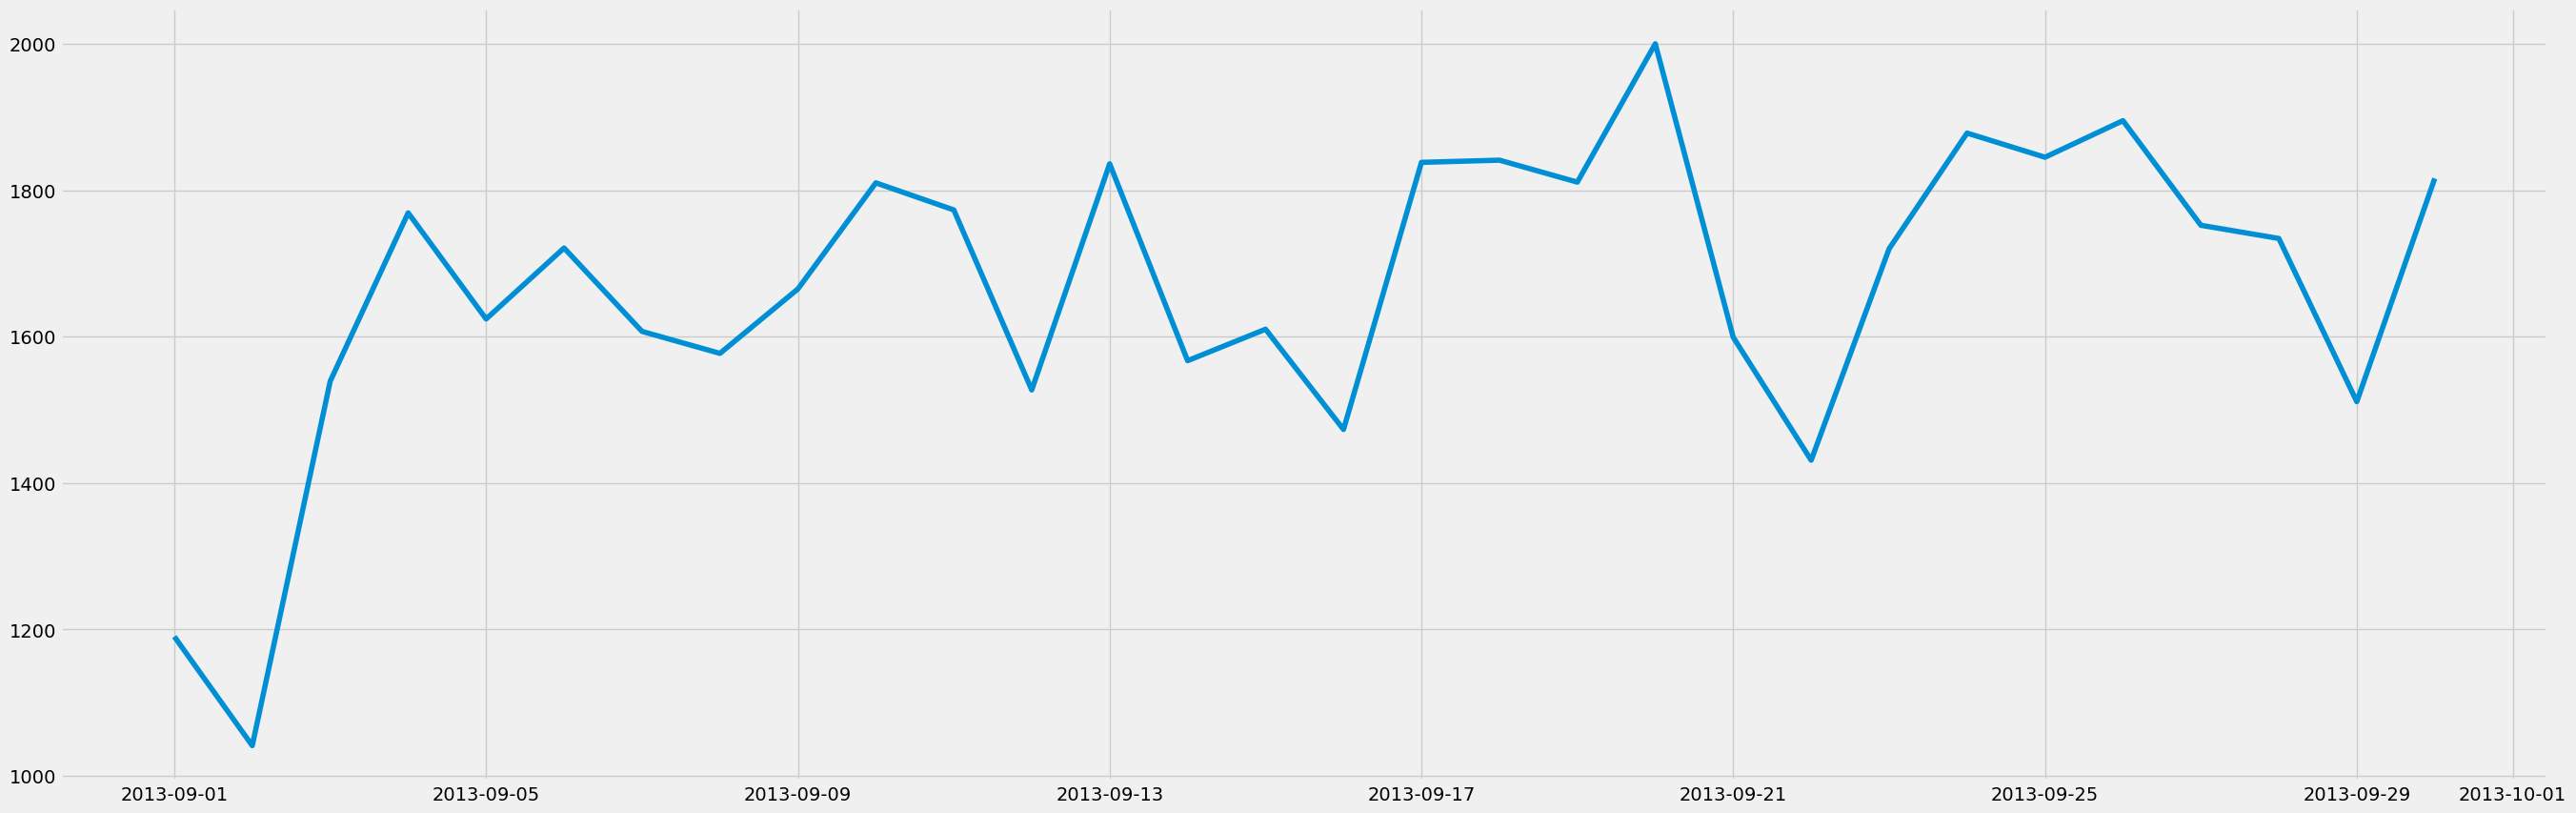

In [25]:
#Lineplot of number of rides per date
plt.figure(figsize=(30,10), dpi=100) 
plt.plot(df_citi_bike_subset)

In [26]:
# Checking for missing values 
df_citi_bike_subset.isnull().sum() 

num_of_trips    0
dtype: int64

In [27]:
#Checking for duplicate values
dups = df_citi_bike_subset.duplicated()
dups.sum()

0

# Decompose

In [28]:
decomposition = sm.tsa.seasonal_decompose(df_citi_bike_subset, model='additive')

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

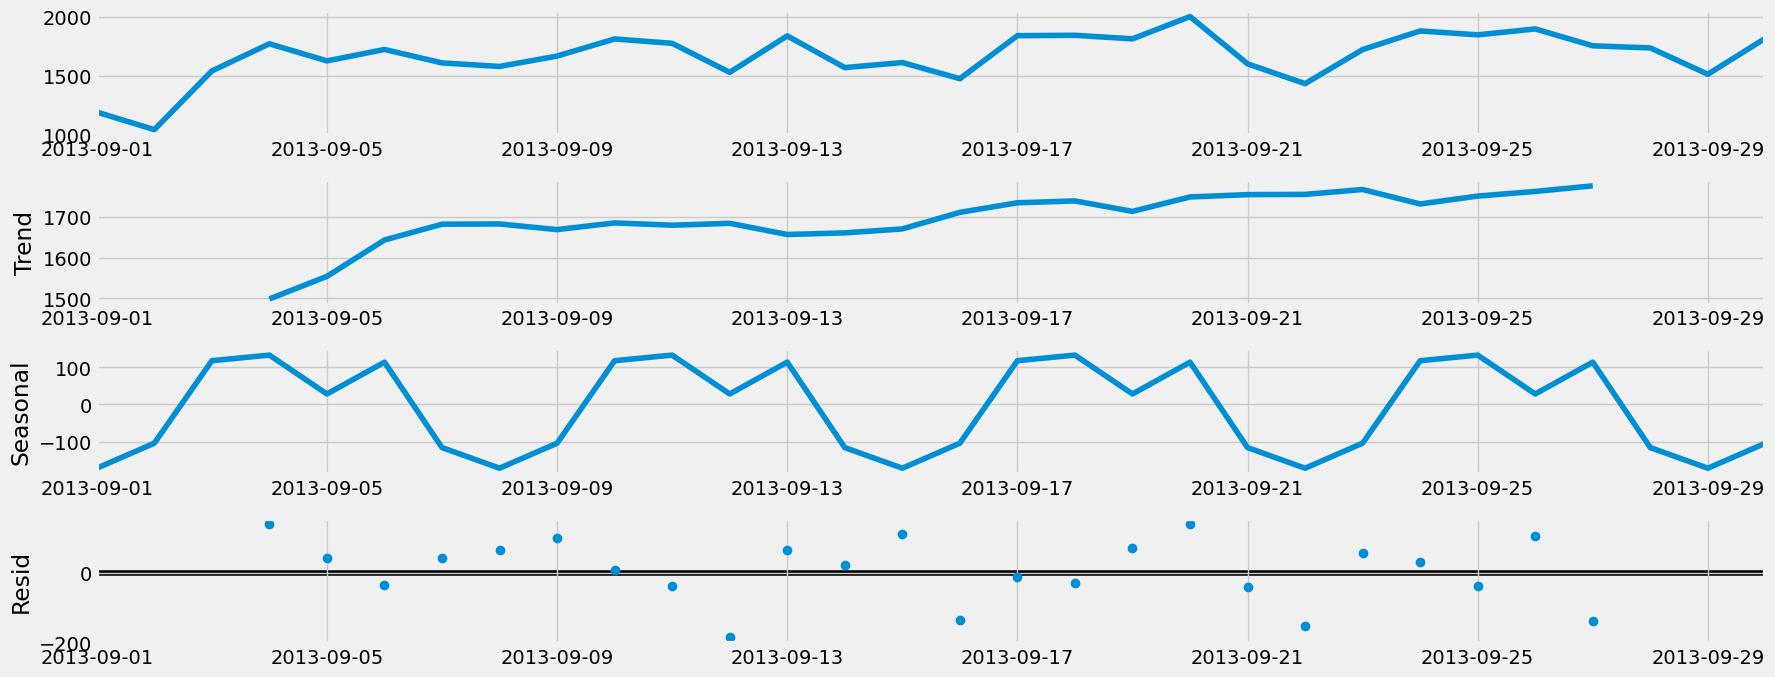

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend graph shows a general increase in trips through the month.

The seasonal graph shows the number of trip fluctuates up and down throughout the month.

The residual graph shows a similar trend to the seasonal graph as it also goes up and down throughout the month.

# Dickey-Fuller Stationary Test

In [32]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_citi_bike_subset['num_of_trips'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.867545
p-value                         0.002287
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


The p value is less than 0.05, which indicates a significant result. The null hypothesis is that there is a unit root within the data, which means the data is stationary.

The null hypothesis was disproven. The test statistic is smaller than all the critical values.

# Autocorrection

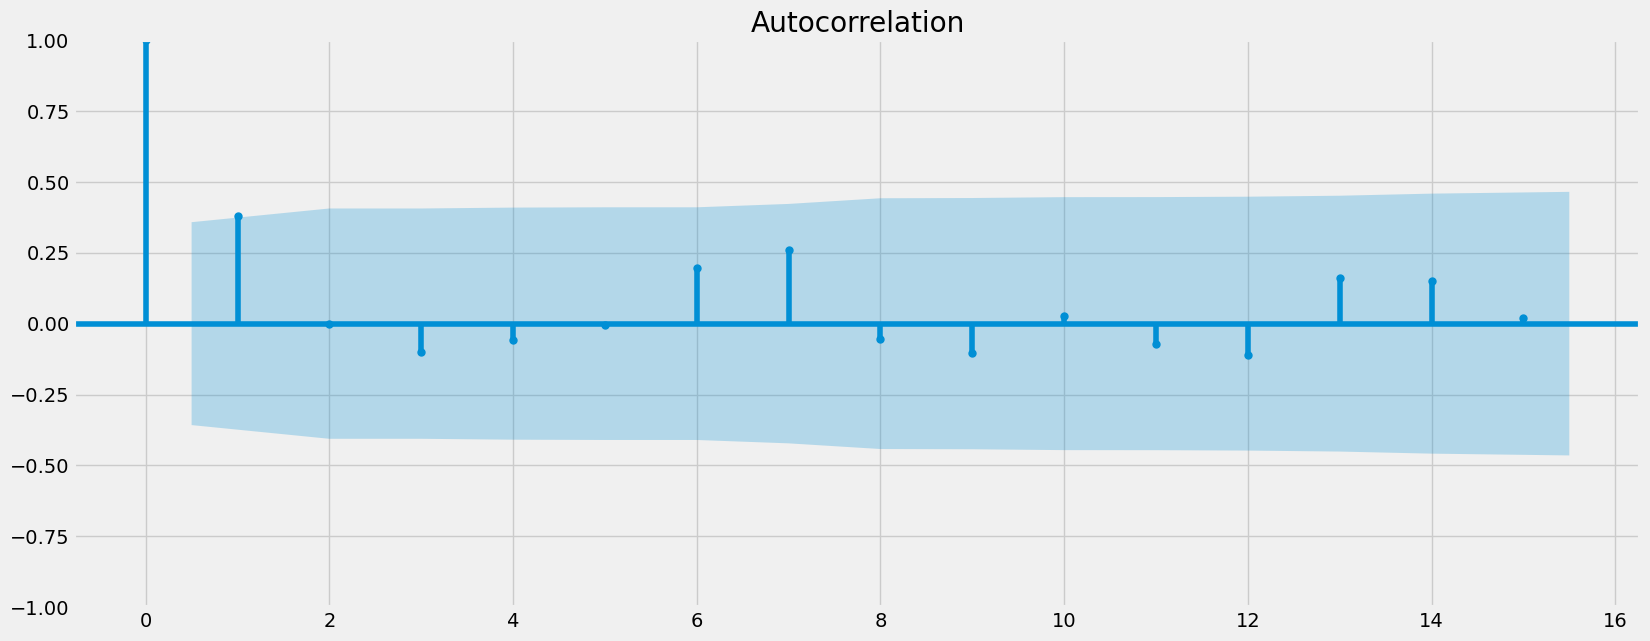

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_citi_bike_subset)
plt.show()